In [170]:
# Edit this cell to print out your name.
print "My name is %s" % ("Jacob Halle")
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

My name is Jacob Halle


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% probability it will rain on any given day in a month. What are the odds that that rain on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [171]:


months = 100000 #number of months to test for
occurance_of_rain = 0 #starting number of occurances is 0

for i in range(0,months): #loops through number of months which in this case is 100000
    rain = 0 #resets number of days rained for the month to zero
    days = np.random.randint(1,6,30) #each number numbers generated in the results has 20% chance
    for j in range(0,len(days)):  
        if days[j] == 1: #goes through the array to see if it is equal to 1
            rain +=1
    if rain == 1: #if only one rainy day at the end of the month then it will count as an occurance 
        occurance_of_rain += 1
print "The number of occurances is %d in %d months" % (occurance_of_rain,months)    
print "The percent of occuring is: %0.3f%%" % (occurance_of_rain/float(months)*100.) #0.3 puts the number to the 3rd place after the decimal


The number of occurances is 917 in 100000 months
The percent of occuring is: 0.917%


\## Problem 2 (20 pts)

Suppose there is a 10% probability that it will rain on any given day in a month. What are the odds that it rain at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [172]:
months = 100000 #number of months to test for 
occurance_of_rain = 0 #occurance of rain starts at 0

for i in range(0,months): #loops through number of months which in this case is 100000
    rain = 0 #establishes rain as 0
    days = np.random.randint(1,11,30) #each number generated has a 10% probability
    for j in range(0,len(days)):  
        if days[j] == 1: #goes through the array to see if it is equal to 1 and if it is then the times it rain goes up by one
            rain +=1
    if rain >= 8: #if occurance is greater than or equal to 8 then the occurance will go up by 1
        occurance_of_rain += 1
print "The number of occurances is %d in %d months" % (occurance_of_rain,months)    
print "The percent of occuring is: %0.3f%%" % (occurance_of_rain/float(months)*100.)#puts the print statement to the 3rd decimal place 

The number of occurances is 775 in 100000 months
The percent of occuring is: 0.775%


## Problem 3 

### 3a (20 pts)

Suppose that if it rain one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% probability of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% probability of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% probability of rain.
* If it rained for the 3 days (or more) before, there is a 5% probability of rain. 
* Otherwise, there is a 10% probability of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 


In [173]:
def amountofrain(days):
    rain = 0 #sum variable
    for q in range(days):
        probability = np.random.random(days) #each number has 10% probability of occurring
        if probability[q] >= 0 and probability[q] <= .2: #20% probability
            rain += 1
        elif probability[q] > .2 and probability[q] <= .5: #30% probability
            rain += 2
        elif probability[q] > .5 and probability[q] <= .8: #30% probability
            rain += 3
        elif probability[q] > .8 and probability[q] <= .9: #10% probability
            rain += 4
        elif probability[q] > .9: #10% probability
            rain += 5
    return rain

In [174]:
months = 10000 #number of months being tested 
truerain = 0 #starts at 0
numberoftrials = 0 #starts at 0
trials = [] #will be used to store the data



for i in range(0,months):
    days = 0 #turns number of days rained in the month to zero
    previousdays = 0 #turns consecutive days rained to zero
    probability = np.random.random #simulates first day of the month
    if probability <= .1:#separated first day case 
        previousdays += 1
        days += 1
    probablityofnextdaywithrain = np.random.random(29) #29 because we already simulated first scenario
    for q in range(0,len(probablityofnextdaywithrain)):
        if previousdays == 1: #rained the day prior
            if probablityofnextdaywithrain[q] <= .2: #simulates a 20% probability
                previousdays += 1
                days += 1
            else:
                previousdays = 0
        elif previousdays == 2: #rained two days consecutively 
            if probablityofnextdaywithrain[q] <= .25: #25% probability
                previousdays += 1
                days += 1
            else:
                previousdays = 0
        elif previousdays >= 3: #rained three days consecutively
            if probablityofnextdaywithrain[q] <= 0.05: #5% probability
                previousdays += 1
                days += 1
            else:
                previousdays = 0
        else:
            if probablityofnextdaywithrain[q] <= .1: #10% probability
                previousdays += 1
                days += 1
            else:
                previousdays = 0
    if amountofrain(days) >= 10: #determines if it rains more then 10cm then it adds 
        truerain += 1
        numberoftrials += 1
    else:
        numberoftrials += 1
    trials.append(amountofrain(days)) #appends the result of rain for the month to trials
percentofprobability = (float(truerain)/float(numberoftrials))*100
print "The odds of getting 10cm of rain in a given month is: %.3f %%" % (percentofprobability)

Trials = trials #creates an equivalent variable

The odds of getting 10cm of rain in a given month is: 37.150 %


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


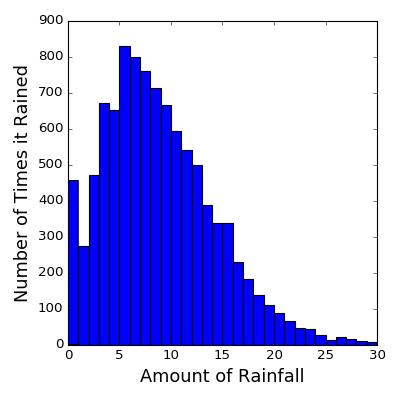

In [175]:
plt.figure(figsize=(5,5))

plt.hist(trials,bins=30,range=(0,30)) 

plt.xlabel("Amount of Rainfall",fontsize=16)
plt.ylabel("Number of Times it Rained",fontsize=16)

plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [188]:
total = 0 #sum 
for i in range(0,len(trials)):
    total += trials[q]
avg = float(total)/len(trials)
print "The average amount of rainfall in a month is: %.3f" % (avg)

The average amount of rainfall in a month is: 5.000


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [190]:
import numpy as np
x = np.array(trials)
y = np.percentile(x, 2.5)#lower percentile
z = np.percentile(x, 97.5)#upper percentile
print y , z

0.0 21.0
